In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Problem 1: Classification of handwritten digits

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a large [database](http://yann.lecun.com/exdb/mnist/) of small images of digits handwritten by high school students and employees of the US Census Bureau.

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5) # display first 5 rows of the dataset

pixel 0  pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  pixel 7  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pixel 8  pixel 9  ...  pixel 775  pixel 776  pixel 777  pixel 778  \
0      0.0      0.0  ...        0.0        0.0        0.0        0.0   
1      0.0      0.0  ...        0.0        0.0        0.0        0.0   
2      0.0      0.0  ...        0.0        0.0        0.0        0.0   
3      0.0      0.0  ...        0.0        0.0        0.0        0.0   
4      0.0      0.0  ...        0.0        0.0        0.0        0.0   

   pixel 779  pixel 780  pixel 781  pixel 782  pixel 783  label  
0        0.0        0.0        0.0        0.0        0.0      5  
1        0.0        0.0        0.0        0.0        0.0      0  
2        0.0        0.0        0.0        0.0        0.0      4  
3        0.0        0.0        0.0        0.0        0.0      1  
4        0.0        0.0        0.0        0.0        0.0      9  

[5 rows x 785 columns]

In [3]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

This dataset contains 5,000 images, and each image has 784 features. 
This is because each image is 28×28  pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 1 (black).

In [4]:
X.shape

(5000, 784)

Let's take a peek at one digit from the dataset. All we need to do is grab a row of $X$, reshape it to a  28×28  array, and display it using ${\tt imshow()}$.

(-0.5, 27.5, 27.5, -0.5)

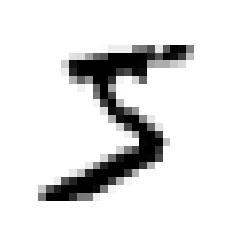

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')

This looks like a 5, and indeed that's what the label tells us

In [6]:
y[0]

5

The following figure shows a few more images from the dataset

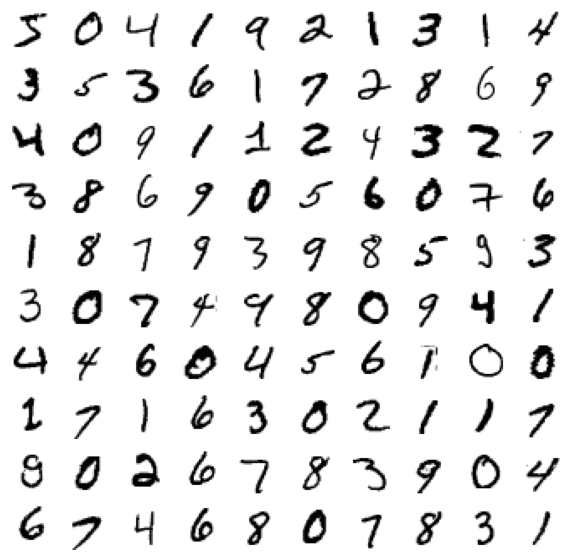

In [7]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X[i]
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

The **goal** of this problem is to fit a linear regression model to identify one digit--for example, the number 0.
This 0-detector will be capable of distinguishing between just two classes, 0 and not-0.

Let's create a (0,1)-vector y_0, where its $i$th entry is given by

$$
\left\{ \begin{array}{ll} 1 & \mbox{ if digit $i$ is a zero}\\
0 & \mbox{ if digit $i$ is not a zero}. \end{array}\right.
$$

In [8]:
y_0 = np.zeros(len(y))
y_0[y==0]=1 # 1 for all 0s, 0 for all other digits

## Part 1

Use the data (X,y_0) to fit a linear regression model that predicts the vector y_0 based on the pixels intensities (matrix $X$). 
Please, use **Gradient Descent** to fit the model. 

## Part 2

Use your linear regression model to classify all the digits in the following test set

In [9]:
# load the test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
data_test = pd.read_csv(url)
data_test.head(5) # display first 5 rows of the dataset

pixel 0  pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  pixel 7  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pixel 8  pixel 9  ...  pixel 775  pixel 776  pixel 777  pixel 778  \
0      0.0      0.0  ...        0.0        0.0        0.0        0.0   
1      0.0      0.0  ...        0.0        0.0        0.0        0.0   
2      0.0      0.0  ...        0.0        0.0        0.0        0.0   
3      0.0      0.0  ...        0.0        0.0        0.0        0.0   
4      0.0      0.0  ...        0.0        0.0        0.0        0.0   

   pixel 779  pixel 780  pixel 781  pixel 782  pixel 783  label  
0        0.0        0.0        0.0        0.0        0.0      8  
1        0.0        0.0        0.0        0.0        0.0      7  
2        0.0        0.0        0.0        0.0        0.0      9  
3        0.0        0.0        0.0        0.0        0.0      9  
4        0.0        0.0        0.0        0.0        0.0      0  

[5 rows x 785 columns]

In [10]:
X_test = data_test.iloc[:,0:784].to_numpy() # pixels
y_test = data_test['label'].to_numpy() # labels

In [11]:
y_0_test = np.zeros(len(y_test))
y_0_test[y_test==0]=1 # 1 for all 0s, 0 for all other digits

Use the folloging **classification rule**:

$$
\mbox{classify digit $i$ as a }\left\{ \begin{array}{ll} 
0 & \mbox{ if predicted y_0_test}[i]>0.5 \\
\mbox{non-}0 & \mbox{ if predicted y_0_test}[i]\leq 0.5
\end{array}\right.
$$

## Part 3

Calculate the percentage of correct and incorrect classifications